# Characterization of Job Postings from Jobstreet.com

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span></li></ul></div>

In [1]:
# import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

The Information Technology (IT) industry has served as one of the top contributors to the economy of the Philippines for the past decade. The increase in popularity of digitization, along with the emergence of artificial intelligence, have made jobs from the IT industry to be one of the most in-demand out of all the industries in the country.

We look at the different IT-related job postings from one of the top job posting sites in the Philippines: Jobstreet.com. The data will not be uploaded since the owner of the data did not wish to share the information.

## Data Exploration

First, we establish the connection to the database and then check the list of tables contained in the database.

In [2]:
# connect to Jobstreet db
conn_js = sqlite3.connect('jobstreet.db')
c_js = conn_js.cursor()

# check the tables in the db
c_js.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c_js.fetchall())

[('jobstreet',)]


Next, we read the table and store it in a DataFrame.

In [3]:
# read info from jobstreet table
df = pd.read_sql("SELECT * FROM jobstreet", conn_js)
display(df.head())
# check the number of entries in the database
print(df.shape)

,id,title,company_id,company,company_industry,description,work_hours,region,location,experience,list_date,expiration_date,industry
0,7479663,Generator Electrical Technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,Candidate must possess at least a Vocational D...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
1,7479643,Generator Mechanical Technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,Candidate must possess at least a Bachelor's/C...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
2,7479634,Vehicle Mechanic,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,Candidate must possess at least a Vocational D...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
3,7479629,Vehicle Electrician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,Candidate must possess at least a Vocational D...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
4,7479624,Portfolio Reconciliation Analyst,NaN,Manulife Business Processing Services,Call Center/IT-Enabled Services/BPO,Are you looking for unlimited opportunities to...,"Regular hours, Mondays - Fridays",Philippines - Central Visayas - Cebu (Cebu City),"The Mactan Newtown, Lapu-Lapu City, Central Vi...",Less than 1 year experience,1509984000,1512576000,None


(433009, 13)


We notice that there is a mix of uppercase and lowercase letters in the entries. We are only interested in the columns `title`, `company`, `description`, and `industry` columns. We convert everything in the `title`, `description` and `industry` columns to lowercase, while the `company` column will be converted to uppercase.

In [4]:
df['company'] = df['company'].str.upper()
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()
df['industry'] = df['industry'].str.lower()
display(df.head())

,id,title,company_id,company,company_industry,description,work_hours,region,location,experience,list_date,expiration_date,industry
0,7479663,generator electrical technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
1,7479643,generator mechanical technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a bachelor's/c...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
2,7479634,vehicle mechanic,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
3,7479629,vehicle electrician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
4,7479624,portfolio reconciliation analyst,NaN,MANULIFE BUSINESS PROCESSING SERVICES,Call Center/IT-Enabled Services/BPO,are you looking for unlimited opportunities to...,"Regular hours, Mondays - Fridays",Philippines - Central Visayas - Cebu (Cebu City),"The Mactan Newtown, Lapu-Lapu City, Central Vi...",Less than 1 year experience,1509984000,1512576000,None


There might be duplicate entries obtained while the site was scraped. In the following cells, we drop the duplicate entries from the DataFrame. We assume that those with the same entries in the columns `title`, `company` and `description` are duplicate entries.

In [5]:
# drop duplicate entries
dff = df.drop_duplicates(subset=['title','company','description'])
display(dff.head())

# check the number of entries after removing duplicate entries
print(dff.shape)

,id,title,company_id,company,company_industry,description,work_hours,region,location,experience,list_date,expiration_date,industry
0,7479663,generator electrical technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
1,7479643,generator mechanical technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a bachelor's/c...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
2,7479634,vehicle mechanic,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
3,7479629,vehicle electrician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
4,7479624,portfolio reconciliation analyst,NaN,MANULIFE BUSINESS PROCESSING SERVICES,Call Center/IT-Enabled Services/BPO,are you looking for unlimited opportunities to...,"Regular hours, Mondays - Fridays",Philippines - Central Visayas - Cebu (Cebu City),"The Mactan Newtown, Lapu-Lapu City, Central Vi...",Less than 1 year experience,1509984000,1512576000,None


(374254, 13)


We now check for any missing values in our duplicate-free database.

In [6]:
# check missing values
dff.isna().sum()

id                       0
title                    0
company_id          105998
company                  0
company_industry     12589
description              0
work_hours          135205
region               41378
location             43384
experience            2589
list_date                0
expiration_date          0
industry               322
dtype: int64

We do a manual check on the rows where the `industry` column was left blank. For the purposes of this analysis, we will disregard the entries with empty values for the `industry` column.

In [7]:
dff[dff['industry'].isnull()]

,id,title,company_id,company,company_industry,description,work_hours,region,location,experience,list_date,expiration_date,industry
0,7479663,generator electrical technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
1,7479643,generator mechanical technician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a bachelor's/c...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
2,7479634,vehicle mechanic,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
3,7479629,vehicle electrician,492613.0,"QUINTRIX INTERNATIONAL MANPOWER CENTER, INC.",Human Resources Management/Consulting,candidate must possess at least a vocational d...,None,Saudi Arabia - Riyadh,"4226 Laredo Street, Palanan, Makati",Min 5 years (Supervisor/5 Yrs & Up Experienced...,1509984000,1512576000,None
4,7479624,portfolio reconciliation analyst,NaN,MANULIFE BUSINESS PROCESSING SERVICES,Call Center/IT-Enabled Services/BPO,are you looking for unlimited opportunities to...,"Regular hours, Mondays - Fridays",Philippines - Central Visayas - Cebu (Cebu City),"The Mactan Newtown, Lapu-Lapu City, Central Vi...",Less than 1 year experience,1509984000,1512576000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,7459384,education and internship consultant,1008460.0,BRIDGE AUSTRALIA MARKETING SOLUTIONS CO.,R&D;,candidate must possess at least bachelor's/col...,"Regular hours, Mondays - Fridays",None,None,Min 1 year (1-4 Yrs Experienced Employee),1509724800,1511452800,None
320,7475247,"patient care coordinator - cebu city, cebu - (...",501247.0,"OPTUM, A UNITEDHEALTH GROUP COMPANY",Call Center/IT-Enabled Services/BPO,don't wait to apply we have training classes s...,Saturdays/Shift required,Philippines - Central Visayas - Cebu City,None,Less than 1 year experience,1509638400,1512144000,None
321,7475106,telecom business analyst,NaN,"OPTUM, A UNITEDHEALTH GROUP COMPANY",Call Center/IT-Enabled Services/BPO,primary responsibilities: develop telecom solu...,Saturdays/Shift required,Philippines - National Capital Reg,"Taguig City, Metro Manila, Philippines",Min 1 year (1-4 Yrs Experienced Employee),1509638400,1512230400,None
322,7432821,contract analyst,493031.0,"EXIMIUS BPO SERVICES, INC.",Call Center/IT-Enabled Services/BPO,job description: there must always be a beginn...,"Regular hours, Mondays - Fridays",Philippines - National Capital Reg - Pasig City,"16th Floor, Octagon Center, San Miguel Avenue,...",Less than 1 year experience,1509638400,1511539200,None


We now check the number of unique values for the database.

In [8]:
# find the number of unique values for each column
dff.nunique()

id                  374254
title               234221
company_id           12670
company              15517
company_industry        60
description         281512
work_hours            2756
region               20978
location             30040
experience             141
list_date              316
expiration_date        334
industry               832
dtype: int64

We look at the list of entries in the `industry` column.

In [9]:
list(df['industry'].value_counts().index)

['customer service',
 'it/computer - software',
 'finance - general/cost accounting',
 'healthcare - nurse/medical support & assistant',
 'human resources',
 'sales - retail/general',
 'general work (housekeeper, driver, dispatch, messenger, etc)',
 'food/beverage/restaurant service',
 'clerical/administrative support',
 'marketing/business development',
 'it/computer - network/system/database admin',
 'banking/financial services',
 'sales - telesales/telemarketing',
 'sales - corporate',
 'engineering - civil/construction/structural',
 'education',
 'engineering - mechanical/automotive',
 'technical & helpdesk support',
 'manufacturing/production operations',
 'engineering - others',
 'others/category not available',
 'purchasing/inventory/material & warehouse management',
 'hotel management/tourism services',
 'it/computer - hardware',
 'arts/creative/graphics design',
 'logistics/supply chain',
 'maintenance/repair (facilities & machinery)',
 'finance - audit/taxation',
 'engineerin

We are only interested in the entries in the IT industry. We are going to filter the entries that contains `it/computer` in the `industry` column.

In [10]:
# drop null values to avoid error
dff_notnull = dff.dropna(subset=['industry'])

# get only jobs in the it/computer industry
df_it = dff_notnull[dff_notnull['industry'].str.contains('it/computer')]
display(df_it.head())
print(df_it.shape)

,id,title,company_id,company,company_industry,description,work_hours,region,location,experience,list_date,expiration_date,industry
353,7485835,technical support representatives - day shift ...,492137.0,DENCOM CONSULTANCY AND MANPOWER SERVICES,Human Resources Management/Consulting,to: all technical support representatives (we ...,None,Philippines - National Capital Reg,"Unit 3009 Cityland Pasong Tamo Tower, 2210 Don...",Min 1 year (1-4 Yrs Experienced Employee),1510156800,1512748800,it/computer - network/system/database admin
364,7485821,android developer( urgent!),502465.0,I2S BUSINESSSOLUTIONS INC.,Human Resources Management/Consulting,requirements:candidate must possess at least a...,None,Philippines - National Capital Reg - Makati,7F BA Lepanto Building 8747 Paseo De Roxas Mak...,Min 3 years (1-4 Yrs Experienced Employee),1510156800,1512748800,it/computer - software
370,7436162,technical engineer,494370.0,"GLOBIS, INC.",Others,candidate must possess at least a bachelor's/c...,"Regular hours, Mondays - Fridays",Philippines - National Capital Reg - Calamba S...,"Calamba Street, Quezon City, Philippines",Min 2 years (1-4 Yrs Experienced Employee),1510156800,1511712000,it/computer - hardware
372,7485813,vulnerability analyst,496985.0,"GLOBAL PAYMENTS PROCESS CENTRE, INC.",Banking/Financial Services,duties and responsibilities• responsible for a...,Rotating,Philippines - National Capital Reg - Mandaluyo...,"EDSA, Mandaluyong City, Philippines",Min 3 years (1-4 Yrs Experienced Employee),1510156800,1512748800,it/computer - network/system/database admin
387,7485794,android developer,502465.0,I2S BUSINESSSOLUTIONS INC.,Human Resources Management/Consulting,candidate must possess at least a bachelor's/c...,None,Philippines - National Capital Reg - Makati city,7F BA Lepanto Building 8747 Paseo De Roxas Mak...,Min 2 years (1-4 Yrs Experienced Employee),1510156800,1512748800,it/computer - software


(35410, 13)


We once again look at the number of unique entries in this DataFrame.

In [11]:
df_it.nunique()

id                  35410
title               23195
company_id           3004
company              3551
company_industry       55
description         30143
work_hours            705
region               2834
location             5064
experience             97
list_date             309
expiration_date       329
industry               68
dtype: int64

There are 68 different entries in the `industry` column. We display these different variations in the next cell.

In [12]:
list(set(df_it['industry']))

['arts/creative/graphics design, it/computer - software',
 'it/computer - hardware, it/computer - network/system/database admin',
 'it/computer - software, training & development',
 'marketing/business development, it/computer - software',
 'it/computer - network/system/database admin, sales - engineering/technical/it',
 'it/computer - software, sales - engineering/technical/it',
 'technical & helpdesk support, it/computer - software',
 'merchandising, it/computer - software',
 'clerical/administrative support, it/computer - software',
 'it/computer - software, engineering - others',
 'it/computer - network/system/database admin, finance - audit/taxation',
 'it/computer - software, technical & helpdesk support',
 'engineering - mechanical/automotive, it/computer - software',
 'it/computer - hardware, it/computer - software',
 'it/computer - network/system/database admin, customer service',
 'finance - audit/taxation, it/computer - software',
 'technical & helpdesk support, it/computer 

We now take a closer look at the different job descriptions in the IT industry.

In [13]:
it_count = df_it['title'].value_counts()
it_count

java developer                                                                315
web developer                                                                 290
software engineer                                                             183
programmer                                                                    174
business analyst                                                              157
                                                                             ... 
netsuite integration developer                                                  1
it solutions project manager                                                    1
english verification specialist                                                 1
senior programmers                                                              1
billing call center executives metro manila upto 30k sal. high school grad      1
Name: title, Length: 23195, dtype: int64

We look at the histogram plot of the job title count.

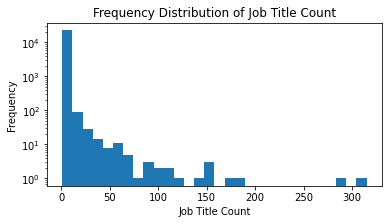

In [14]:
fig, ax = plt.subplots(figsize=(6,3))
ax.hist(it_count, bins=30);
ax.set_yscale('log')
ax.set_xlabel('Job Title Count')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Job Title Count');

A lot of the entries in the `title` column are unique. We check the number of unique entries in the cell.

In [15]:
it_count[it_count==1]

sql developer (senior to supervisor level)                                    1
free bluetooth speaker | 21k-23k salary |  tsr for telus market market        1
sr. developer for robotics automation                                         1
product rationalization consultant (telco)                                    1
senior  .net developer                                                        1
                                                                             ..
netsuite integration developer                                                1
it solutions project manager                                                  1
english verification specialist                                               1
senior programmers                                                            1
billing call center executives metro manila upto 30k sal. high school grad    1
Name: title, Length: 19845, dtype: int64

Almost 20,000 entries in the `title` column are unique. We take a sneak peak at the bottom 50 entries of the list. It appears that there are low counts because there are additional descriptions included in the `title` column. Some are vaguely described.

In [16]:
it_count.tail(50)

urgent hiring! sr. ruby on rails                                                    1
sim lead (security infrastructure lead) / ipc lead                                  1
urgently hiring: project manager (software development)                             1
full stack .net developer (night shift)                                             1
urgent hiring: automation tester i qa - makati or bgc taguig                        1
manager                                                                             1
sr. asp developer                                                                   1
p38,000* potential pay ● search engine - technical support ● it network (makati)    1
qa automation / sdet                                                                1
*oracle sql developer                                                               1
tech support | free daily meals + earn up to 26k | ayala telus                      1
apply @ convergys north edsa & be our tsr for our cabl

We look at the top 50 job descriptions in the IT industry.

In [17]:
it_count.head(50)

java developer                315
web developer                 290
software engineer             183
programmer                    174
business analyst              157
.net developer                157
software developer            148
php developer                 138
it staff                      126
project manager               114
ios developer                 110
it specialist                 100
android developer              98
system administrator           93
network engineer               92
it manager                     91
salesforce developer           78
front end developer            71
database administrator         70
senior java developer          66
mobile developer               66
network administrator          65
senior web developer           63
it supervisor                  60
senior software engineer       59
technical writer               58
senior .net developer          58
systems administrator          56
data analyst                   56
sharepoint dev